In [1]:
import keras

In [2]:
import os, shutil

Now i will point to the original directory where my data is stored.

In [3]:
original_dataset_dir ='train'

In [4]:
base_dir = '/cats_and_dogs'
os.mkdir(base_dir)

Our next step will be to make three directories each one for train data, validation data and test data respectively.

In [5]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [6]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [7]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In this step i will make two directories in each od train, validation and test directory.

• First for cat images.
 • and Second for Dog images.

In [8]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir) #training directory for cat

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir) #training directory for dog

In [9]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir) #validation directory for cat

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir) #validation directory for dog

In [10]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir) #test directory for cat

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir) #test directory for dog

Now our all directories and subdirectories are ready , our next step will be to copy images from original_dataset_directory to
subdirectories under base directory.

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 12000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(12000, 12499)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 12000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
fnames = ['dog.{}.jpg'.format(i) for i in range(12000, 12499)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

As you can see that our data is divided into three categores named as train, validation and test data.
Our next step will be to build a model.

In [17]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3))) #here i'm resizing all image to the same dimension.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Our model is ready , so let's check parameters and summary.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

As you can see that there are 3453121 trainable parameters.

So let's train our model.

In [19]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=0.0003),
metrics=['acc'])

Before fitting our model to the CNN . I will convert our image to numpy array and make all elemets of array between 0 and 1
by diving it by 255(maximum value).

In [22]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


Now in final step let's fit our model.

In [23]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 124s 1s/step - loss: 0.6928 - acc: 0.5525 - val_loss: 0.6700 - val_acc: 0.5960
Epoch 2/30
100/100 [==============================] - 175s 2s/step - loss: 0.6519 - acc: 0.6145 - val_loss: 0.6357 - val_acc: 0.6290
Epoch 3/30
100/100 [==============================] - 153s 2s/step - loss: 0.6276 - acc: 0.6495 - val_loss: 0.6003 - val_acc: 0.6770
Epoch 4/30
100/100 [==============================] - 134s 1s/step - loss: 0.6137 - acc: 0.6615 - val_loss: 0.5815 - val_acc: 0.6910
Epoch 5/30
100/100 [==============================] - 125s 1s/step - loss: 0.5878 - acc: 0.6815 - val_loss: 0.6018 - val_acc: 0.6870
Epoch 6/30
100/100 [==============================] - 149s 1s/step - loss: 0.5613 - acc: 0.6990 - val_loss: 0.5434 - val_acc: 0.7250
Epoch 7/30
100/100 [==============================] - 133s 1s/step - loss: 0.5494 - acc: 0.7230 - val_loss: 0.5879 - val_acc: 

It took lot of time on CPU  ..... now le't plot graphs.

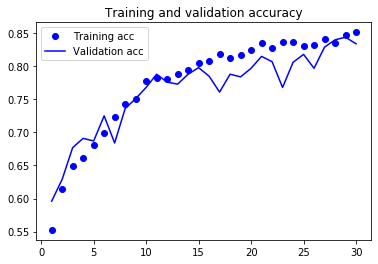

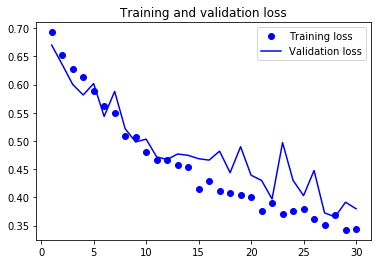

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

to improve our model ... i will try tranfer learning in my next notebook.

                                                     THANKYOU